In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [7]:
df = pd.read_csv('../data/dataset.csv')
test_features = pd.read_csv('../data/just_features.csv')

# Display the first few rows
print("Training Dataset:")
print(df.head())
print("\nTest Dataset:")
print(test_features.head())

Training Dataset:
      genero estado_civil zona_residencia   imc fumador       class_etaria  \
0  masculino       casado       suburbana  35.8     sim  adulto_meia_idade   
1   feminino     separado          urbana  39.3     nao      adulto_senior   
2  masculino     solteiro           rural  40.7     nao              jovem   
3  masculino       casado          urbana  28.2     sim  adulto_meia_idade   
4   feminino     solteiro          urbana  31.1     nao      adulto_senior   

     custo  
0  18213.9  
1   4266.4  
2    854.6  
3  10169.7  
4   4151.5  

Test Dataset:
      genero estado_civil zona_residencia   imc fumador       class_etaria
0   feminino       casado       suburbana  25.6     sim  adulto_meia_idade
1   feminino       casado       suburbana  23.1     sim      adulto_senior
2  masculino     solteiro       suburbana  26.3     nao        adolescente
3   feminino     solteiro       suburbana  27.0     nao        adolescente
4   feminino       casado           rural  32

In [8]:
# 2. Encode categorical features using Label Encoding
label_encoders = {}
categorical_columns = ['genero', 'estado_civil', 'zona_residencia', 'fumador', 'class_etaria']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    test_features[col] = le.transform(test_features[col])  # Encode test features
    label_encoders[col] = le

print("\nEncoded Training Data:")
print(df.head())



Encoded Training Data:
   genero  estado_civil  zona_residencia   imc  fumador  class_etaria    custo
0       1             0                1  35.8        1             2  18213.9
1       0             1                2  39.3        0             3   4266.4
2       1             2                0  40.7        0             5    854.6
3       1             0                2  28.2        1             2  10169.7
4       0             2                2  31.1        0             3   4151.5


In [9]:
# 3. Define features (X) and target variable (y)
X = df.drop('custo', axis=1)
y = df['custo']


In [10]:
# 4. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 5. Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
test_features_scaled = scaler.transform(test_features)  # Scale test features


In [12]:
# 6. Train the Support Vector Regression (SVR) model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

SVR(C=100, gamma=0.1)

In [13]:
# 7. Evaluate the model
y_pred = svr.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"\nModel Evaluation:\nR2 Score: {r2:.4f}\nMean Squared Error: {mse:.4f}")



Model Evaluation:
R2 Score: 0.1917
Mean Squared Error: 89513449.6844


In [21]:
# 8. Predict costs for the test dataset
predicted_costs = svr.predict(test_features_scaled)
# Save the predictions to a CSV file
output = pd.DataFrame({'custo': predicted_costs}).round({'custo':1})
output.to_csv('../results/grupo45_custos_estimados.csv', index=False)
print("\nPredicted costs saved to 'grupo45_custos_estimados.csv'.")


Predicted costs saved to 'grupo45_custos_estimados.csv'.



Feature Importance:
           Feature  Importance
4          fumador    0.253430
5     class_etaria    0.024087
3              imc    0.022074
2  zona_residencia    0.005396
1     estado_civil    0.005180
0           genero    0.001955


C:\Users\bikal\AppData\Local\Temp\ipykernel_14604\380616515.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


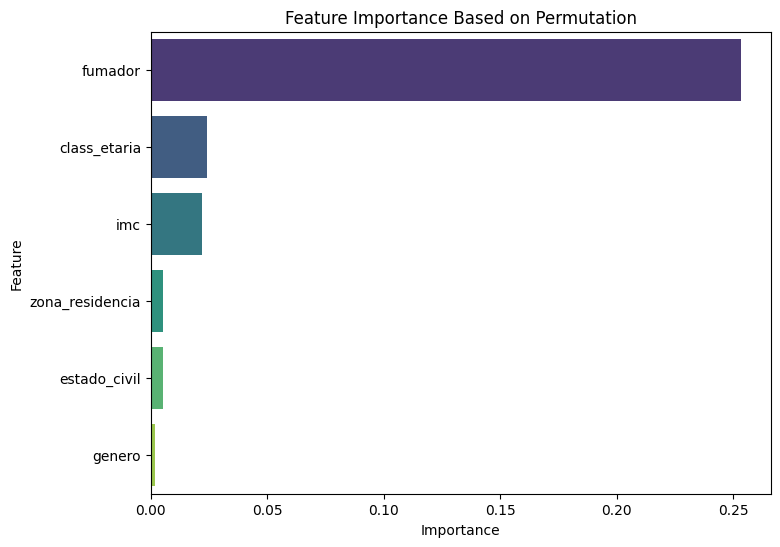

In [18]:
# 9. Identify Feature Importance
# Using a "feature permutation" technique to estimate importance
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(svr, X_test_scaled, y_test, scoring='r2')
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': perm_importance.importances_mean})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# Display feature importance
print("\nFeature Importance:")
print(feature_importances)
# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance Based on Permutation")
plt.show()
